# Predicting heart disease using machine learning

This notebook looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model and whether or not a person has heart disease

Approcah: 
1. Problem Definition
2. Data
3. Evaluation
4. Feature
5. Modelling
6. Experimentation 

## 1. Problem Definition 
> Given clinical parameters about a patient can we predict whether or not a patient as heart disease

## 2. Data 
Create a data dictionary 
  * Can use kaggle or uci for downloading dataset
  
## 3. Evaluation
 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue

## 4. Features
> This is where you get different information about each of the features in data

## Preparing the tools 
We're going to use Pandas, Numpy and Matoplotlib for data analysis and manipulation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

%matplotlib inline

# Models  from SKlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

## Data exploration 

The goal here is to find out more about the data and to become a subject matter expert on  the dataset you're working with

1. What questions are you trying to solve? 
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add or remove features to get more out of your data

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

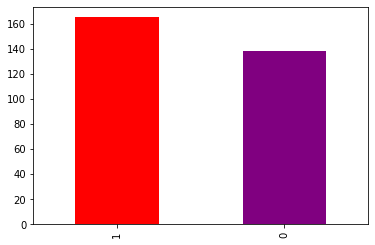

In [6]:
df.target.value_counts().plot(kind = 'bar', color = ['red', 'purple'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to sex

In [9]:
df.sex.value_counts() #1 = male, 0=  female

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target coloumn with sex coloumn
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

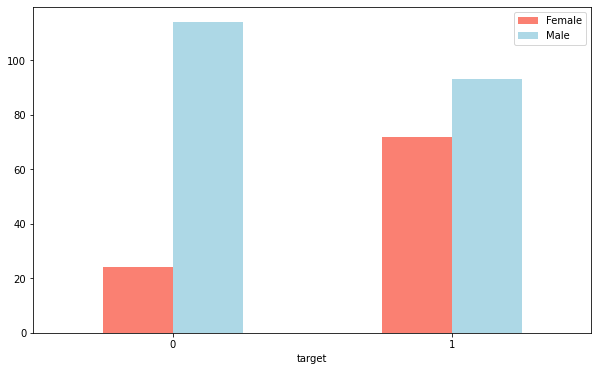

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10 , 6),
                                    color = ['salmon','lightblue']);
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)

## Age vs Max Heart rate for Heart Disease

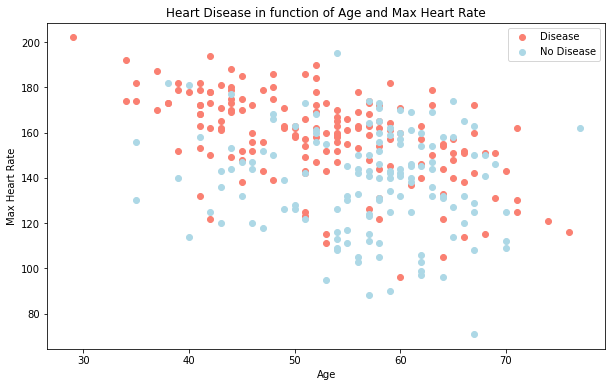

In [12]:
plt.figure(figsize = (10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           color = 'salmon')

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           color = 'lightblue');

#Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

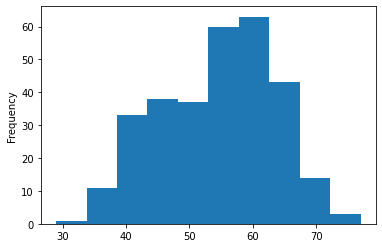

In [13]:
# Check the distribution of age column with a histogram
df.age.plot.hist();


### Heart Disease frequency per chest pain type

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

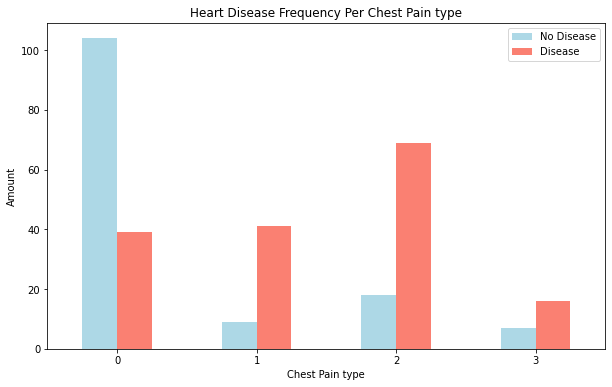

In [15]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10,6), color = ['lightblue','salmon'])
plt.title('Heart Disease Frequency Per Chest Pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0)

In [16]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


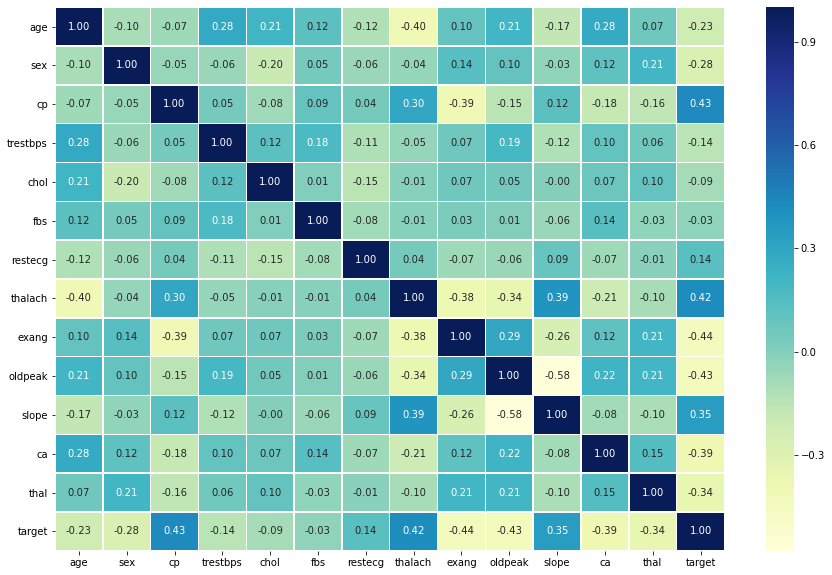

In [17]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = '.2f',
                cmap = 'YlGnBu')

## Modelling

In [18]:
x = df.drop('target', axis = 1)
y = df.target

In [19]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2


Going to try 3 different models : 
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. RandomForest Classifier

In [21]:
models = {'Logistic Regression' : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        #Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [22]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

c:\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

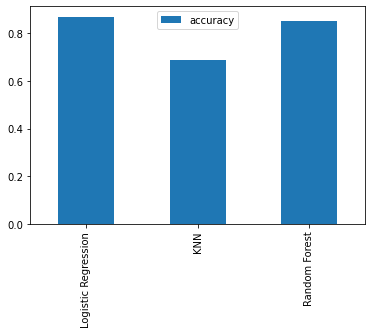

In [23]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

### What I have to find:

* Hyperparameter tuning
* Feature important
* Confusion matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification
* ROC Curve
* Area Under the Curve (AUC)

In [24]:
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    
    test_scores.append(knn.score(x_test, y_test))
    

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data set is 75.41%


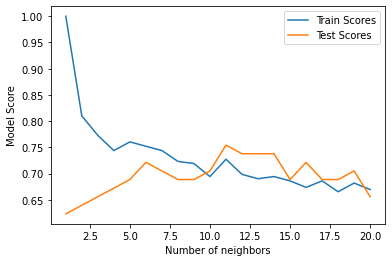

In [26]:
plt.plot(neighbors, train_scores, label = 'Train Scores')
plt.plot(neighbors, test_scores, label = 'Test Scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN Score on the test data set is {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

* Logistic Regression()
* RandomForestClassifier()

In [27]:
#Grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver' : ['liblinear']}

# grid for RandomForest
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
          'max_depth' : [None, 3, 5, 10],
          'min_samples_split' : np.arange(2, 20, 2),
          'min_samples_leaf' : np.arange(1, 20, 2)}

In [28]:
#Tune LogisticReression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv =5,
                               n_iter =20,
                               verbose = True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
c:\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [31]:
# Tune RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv =5,
                          n_iter = 20,
                          verbose = True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished
c:\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960]), 'max_depth': [None, 3, 5, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn

In [32]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [33]:
rs_rf.score(x_test, y_test)

0.8688524590163934

### Hyperparameter tuning using gridSearchCV

In [34]:
# Tuning LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver' : ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv =5,
                         verbose = True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
c:\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-04, 1.88739e-04, 3.56225e-04, 6.72336e-04, 1.26896e-03,
       2.39503e-03, 4.52035e-03, 8.53168e-03, 1.61026e-02, 3.03920e-02,
       5.73615e-02, 1.08264e-01, 2.04336e-01, 3.85662e-01, 7.27895e-01,
       1.37382e+00, 2.59294e+00, 4.89390e+00, 9.23671e+00, 1.74333e+01,
       3.29034e+01, 6.21017e+01, 1.17210e+02, 2.21222e+02, 4.17532e+02,
       7.88046e+02, 1.48735e+03, 2.80722e+03, 5.29832e+03, 1.00000e+04]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [38]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_probs = gs_log_reg.predict_proba(x_test)
y_probs[:10]

array([[0.86725267, 0.13274733],
       [0.24408492, 0.75591508],
       [0.18547575, 0.81452425],
       [0.94530777, 0.05469223],
       [0.11546638, 0.88453362],
       [0.12929708, 0.87070292],
       [0.39487819, 0.60512181],
       [0.99564019, 0.00435981],
       [0.98623623, 0.01376377],
       [0.43861524, 0.56138476]])

In [45]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.13274733, 0.75591508, 0.81452425, 0.05469223, 0.88453362,
       0.87070292, 0.60512181, 0.00435981, 0.01376377, 0.56138476])

In [47]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

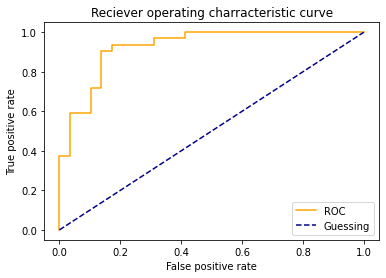

In [48]:
# from sklearn.metrics import plot_roc_curve # Cannot import it
def plot_curve(fpr, tpr):
    """
    
    PLots a ROC curve given the fpr and tpr of a model
    """
    #plot curve
    plt.plot(fpr,tpr,color = 'orange', label = 'ROC')
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle= '--', label = 'Guessing')
             
             
    #Customize plot
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Reciever operating charracteristic curve')
    plt.legend()
    plt.show()
    
plot_curve(fpr, tpr)

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.925646551724138

In [51]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


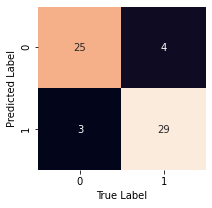

In [52]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots confusion matrix using seaborn's  heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

plot_conf_mat(y_test, y_preds)

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [55]:
#Calculate evaluation metrics using Cross_val_score()
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(C =0.20433597178569418,
                        solver = 'liblinear')

In [64]:
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv =5,
                        scoring = 'accuracy')
cv_acc, np.mean(cv_acc)


(array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ]),
 0.8479781420765027)

In [84]:
cv_acc = np.mean(cv_acc)

In [66]:
cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv =5,
                        scoring = 'precision')
cv_precision, np.mean(cv_precision)

(array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ]),
 0.8215873015873015)

In [67]:
cv_precision = np.mean(cv_precision)

In [69]:
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv =5,
                        scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [86]:
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv =5,
                        scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [89]:
cv_acc

0.8479781420765027

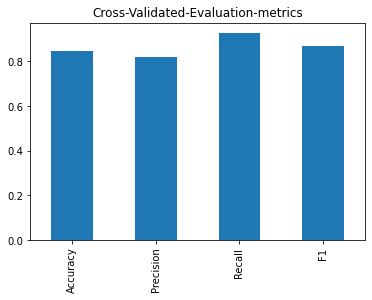

In [93]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1}, 
                         index = [0])
cv_metrics.T.plot.bar(title = 'Cross-Validated-Evaluation-metrics',legend = False)

### Feature Importance
(Model Name) Feature Importance

In [97]:
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418, 
                        solver = 'liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
clf.coef_

array([[ 0.00316728, -0.86044617,  0.66067061, -0.01156993, -0.00166374,
         0.04386124,  0.31275811,  0.02459361, -0.60413059, -0.56862833,
         0.45051624, -0.63609878, -0.67663384]])

In [101]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672768718066374,
 'sex': -0.8604461693923375,
 'cp': 0.6606706079072107,
 'trestbps': -0.01156993088001936,
 'chol': -0.0016637432048458467,
 'fbs': 0.04386124352228977,
 'restecg': 0.31275810914873253,
 'thalach': 0.024593611733792636,
 'exang': -0.604130594692293,
 'oldpeak': -0.5686283345956379,
 'slope': 0.4505162361992617,
 'ca': -0.6360987838903692,
 'thal': -0.6766338369108799}

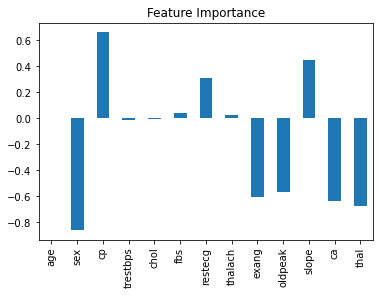

In [104]:
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False);

## Experimentation

* Give me more data
* Should use a better model like CatBoost or XGBoost
* More hyperparameter tuning?